<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [11]:
import pandas as pd
import numpy as np

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [12]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [13]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [14]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [15]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [16]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

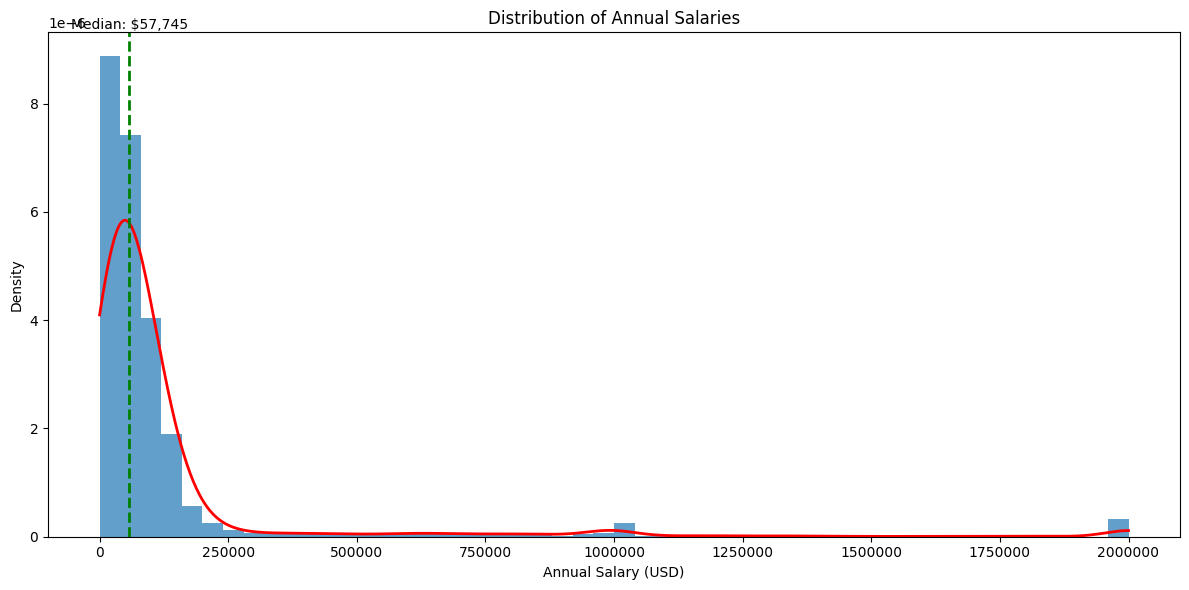

Median Salary: $57,745.00
Mean Salary: $131,596.73
Min Salary: $0.00
Max Salary: $2,000,000.00


In [23]:
# Assuming df is your DataFrame
# Remove any NaN values from ConvertedComp
df_clean = df.dropna(subset=['ConvertedComp'])

# Create the plot
plt.figure(figsize=(12, 6))

# Plot histogram
n, bins, patches = plt.hist(df_clean['ConvertedComp'], bins=50, density=True, alpha=0.7)

# Plot KDE
kde = gaussian_kde(df_clean['ConvertedComp'])
xx = np.linspace(df_clean['ConvertedComp'].min(), df_clean['ConvertedComp'].max(), 1000)
plt.plot(xx, kde(xx), 'r-', linewidth=2)

# Set labels and title
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.title('Distribution of Annual Salaries')

# Adjust x-axis to show more readable values
plt.ticklabel_format(style='plain', axis='x')

# Add a vertical line for the median
median_salary = df_clean['ConvertedComp'].median()
plt.axvline(median_salary, color='green', linestyle='dashed', linewidth=2)
plt.text(median_salary, plt.ylim()[1], f'Median: ${median_salary:,.0f}', 
         horizontalalignment='center', verticalalignment='bottom')

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Median Salary: ${median_salary:,.2f}")
print(f"Mean Salary: ${df_clean['ConvertedComp'].mean():,.2f}")
print(f"Min Salary: ${df_clean['ConvertedComp'].min():,.2f}")
print(f"Max Salary: ${df_clean['ConvertedComp'].max():,.2f}")


Plot the histogram for the column `ConvertedComp`.


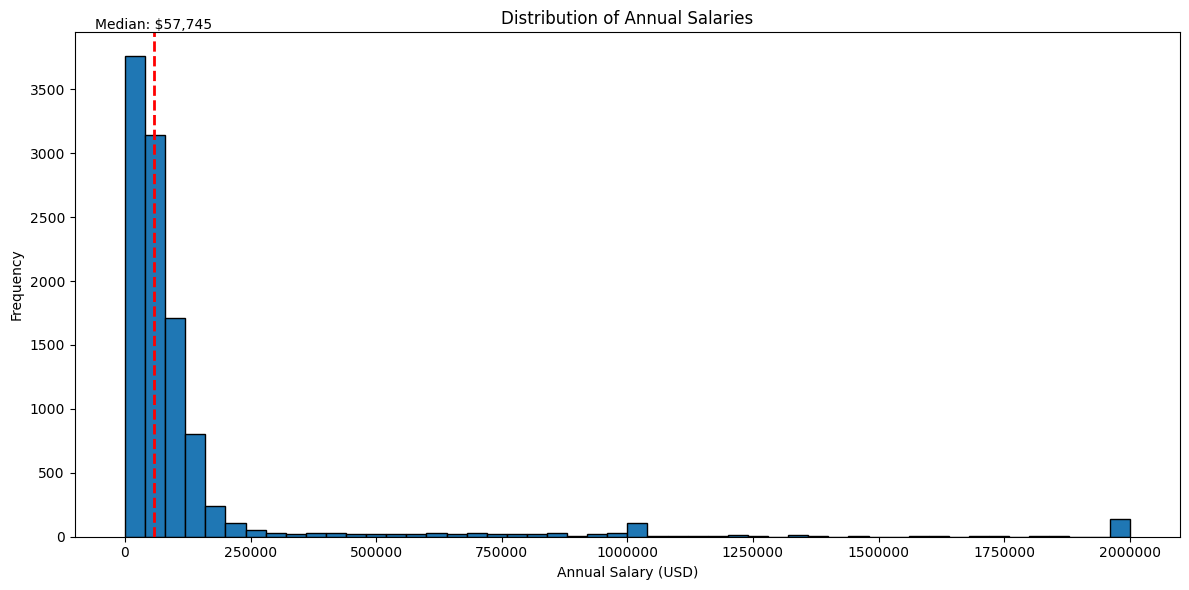

Median Salary: $57,745.00
Mean Salary: $131,596.73
Min Salary: $0.00
Max Salary: $2,000,000.00


In [24]:
# your code goes here

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(df_clean['ConvertedComp'], bins=50, edgecolor='black')

# Set labels and title
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Salaries')

# Adjust x-axis to show more readable values
plt.ticklabel_format(style='plain', axis='x')

# Add a vertical line for the median
median_salary = df_clean['ConvertedComp'].median()
plt.axvline(median_salary, color='red', linestyle='dashed', linewidth=2)
plt.text(median_salary, plt.ylim()[1], f'Median: ${median_salary:,.0f}', 
         horizontalalignment='center', verticalalignment='bottom')

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Median Salary: ${median_salary:,.2f}")
print(f"Mean Salary: ${df_clean['ConvertedComp'].mean():,.2f}")
print(f"Min Salary: ${df_clean['ConvertedComp'].min():,.2f}")
print(f"Max Salary: ${df_clean['ConvertedComp'].max():,.2f}")

What is the median of the column `ConvertedComp`?


In [26]:
# your code goes here
print(f"Median Salary: ${median_salary:,.2f}")

Median Salary: $57,745.00


How many responders identified themselves only as a **Man**?


In [30]:
# your code goes here

# Filter the DataFrame for respondents who identified only as 'Man'
men_respondents = df[df['Gender'] == 'Man']

# Count the number of respondents
num_men = len(men_respondents)

print(f"Number of respondents who identified only as a Man: {num_men}")

Number of respondents who identified only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [28]:
# your code goes here

# Filter the DataFrame for respondents who identified as 'Woman'
women_respondents = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for women
median_comp_women = women_respondents['ConvertedComp'].median()

print(f"The median ConvertedComp for respondents who identified as 'Woman' is: ${median_comp_women:,.2f}")

The median ConvertedComp for respondents who identified as 'Woman' is: $57,708.00


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [32]:
# your code goes here
age_summary = df['Age'].describe()
print(age_summary)

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


In [36]:
# additional for graded quiz
# What is the median Age of survey respondents?

df['Age'].median()

29.0

Plot a histogram of the column `Age`.


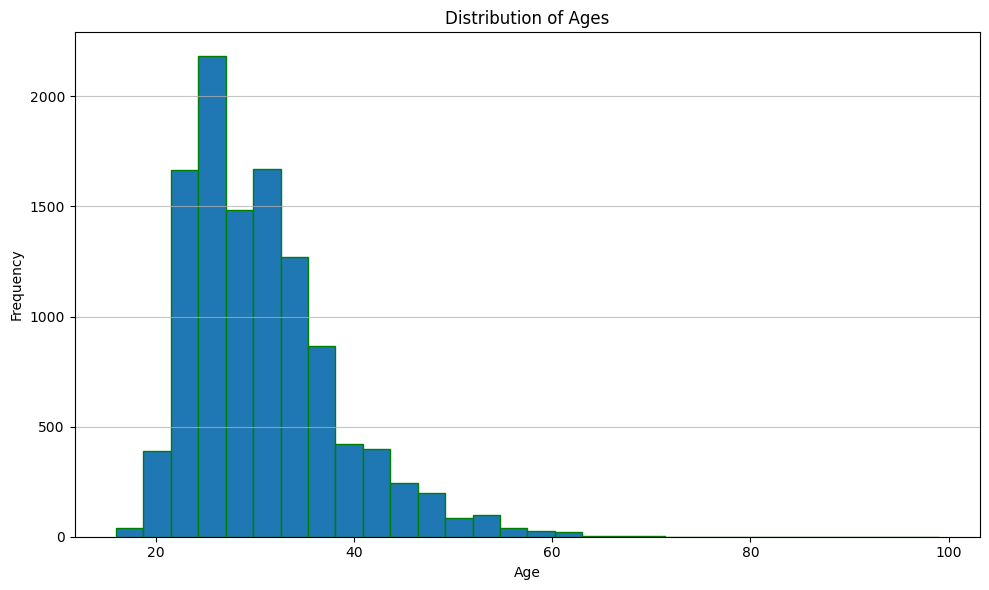

In [35]:
# your code goes here

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='green')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.tight_layout()
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


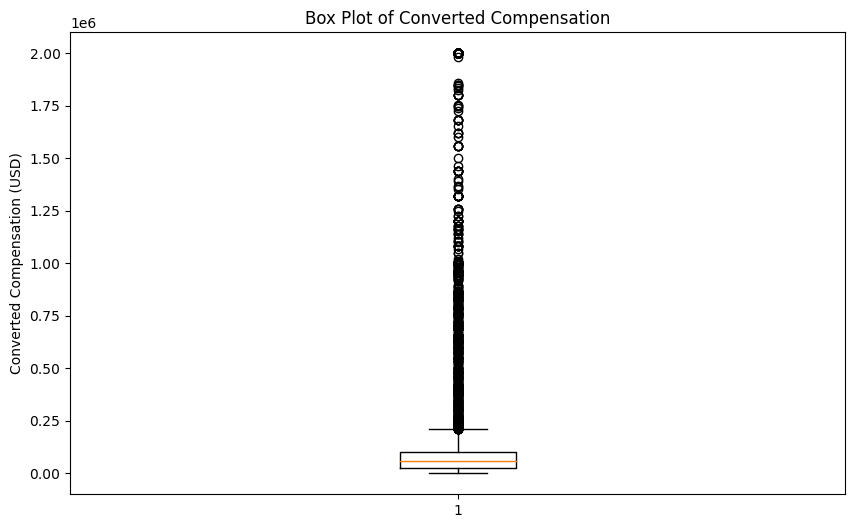

Number of outliers: 879
Minimum outlier value: $209,892.00
Maximum outlier value: $2,000,000.00


In [37]:
# your code goes here

import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(df['ConvertedComp'].dropna(), whis=1.5)

# Set labels and title
plt.ylabel('Converted Compensation (USD)')
plt.title('Box Plot of Converted Compensation')

# Show the plot
plt.show()

# Identify outliers
outliers = box_plot['fliers'][0].get_ydata()

print(f"Number of outliers: {len(outliers)}")
print(f"Minimum outlier value: ${min(outliers):,.2f}")
print(f"Maximum outlier value: ${max(outliers):,.2f}")

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [38]:
# your code goes here

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print(f"Q1 (25th percentile): ${Q1:,.2f}")
print(f"Q3 (75th percentile): ${Q3:,.2f}")
print(f"Inter Quartile Range (IQR): ${IQR:,.2f}")

Q1 (25th percentile): $26,868.00
Q3 (75th percentile): $100,000.00
Inter Quartile Range (IQR): $73,132.00


Find out the upper and lower bounds.


In [39]:
# your code goes here

# Calculate Q1, Q3, and IQR
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: ${lower_bound:,.2f}")
print(f"Upper bound: ${upper_bound:,.2f}")


Lower bound: $-82,830.00
Upper bound: $209,698.00


Identify how many outliers are there in the `ConvertedComp` column.


In [41]:
# your code goes here

import numpy as np

# Calculate Q1, Q3, and IQR
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = len(outliers)

print(f"Number of outliers in ConvertedComp: {num_outliers}")


Number of outliers in ConvertedComp: 879


In [42]:
# additional for graded quiz
# What is the median ConvertedComp before removing outliers?

df['ConvertedComp'].median()

57745.0

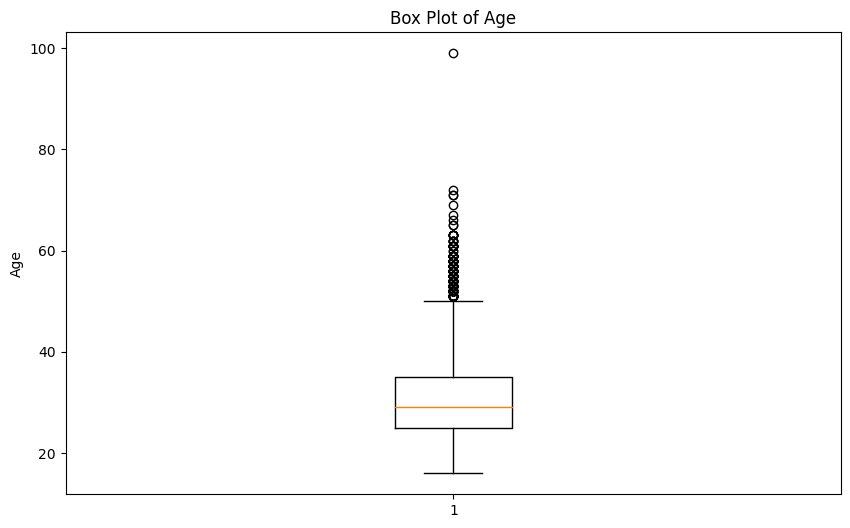

Number of outliers below Q1: 0


In [43]:
# additional for graded quiz
# Based on the boxplot of ‘Age’ how many outliers do you see below Q1?

import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(df['Age'].dropna(), whis=1.5)

# Set labels and title
plt.ylabel('Age')
plt.title('Box Plot of Age')

# Show the plot
plt.show()

# Get the outliers
outliers = box_plot['fliers'][0].get_ydata()

# Count outliers below Q1
Q1 = df['Age'].quantile(0.25)
outliers_below_Q1 = sum(1 for outlier in outliers if outlier < Q1)

print(f"Number of outliers below Q1: {outliers_below_Q1}")


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [46]:
# your code goes here

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print information about the original and new DataFrames
print(f"Original DataFrame shape: {df.shape}")
print(f"New DataFrame shape (without outliers): {df_no_outliers.shape}")
print(f"Number of rows removed: {df.shape[0] - df_no_outliers.shape[0]}")

Original DataFrame shape: (11398, 85)
New DataFrame shape (without outliers): (9703, 85)
Number of rows removed: 1695


In [49]:
# additional for graded quiz
# What is the median ConvertedComp after removing outliers?

df_no_outliers['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [50]:
# your code goes here

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation of Age with other numeric columns
age_correlations = numeric_columns.corr()['Age'].sort_values(ascending=False)

# Print correlations
print("Correlations with Age:")
print(age_correlations)

Correlations with Age:
Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
